In [ ]:
!pip install wbdata

In [1]:
import wbdata
import pandas as pd
import numpy as np
import statsmodels

In [3]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [30]:
wbdata.get_indicator(source=15) 

id             name
-------------  ----------------------------------------------------------------
CORENS         Core CPI,not seas.adj,,,
CORESA         Core CPI,seas.adj,,,
CPTOTNSXN      CPI Price, nominal
CPTOTSAXMZGY   CPI Price, % y-o-y, median weighted, seas. adj.
CPTOTSAXN      CPI Price, nominal, seas. adj.
CPTOTSAXNZGY   CPI Price, % y-o-y, nominal, seas. adj.
DMGSRMRCHNSCD  Imports Merchandise, Customs, current US$, millions
DMGSRMRCHNSKD  Imports Merchandise, Customs, constant US$, millions
DMGSRMRCHNSXD  Imports Merchandise, Customs, Price, US$
DMGSRMRCHSACD  Imports Merchandise, Customs, current US$, millions, seas. adj.
DMGSRMRCHSAKD  Imports Merchandise, Customs, constant US$, millions, seas. adj.
DMGSRMRCHSAXD  Imports Merchandise, Customs, Price, US$, seas. adj.
DPANUSLCU      Official exchange rate, LCU per USD, period average
DPANUSSPB      Exchange rate, new LCU per USD extended backward, period average
DPANUSSPF      Exchange rate, old LCU per USD extended forwar

"Inflation, consumer prices (annual %)" (source: World Development Indicators): Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services

"External debt stocks, total (DOD, current US$)" (source: International Debt Statistics): Total external debt is debt owed to nonresidents repayable in currency, goods, or services.

"Lending interest rate (%) - Real" (source: International Financial Statistics)

"Control of Corruption" (source: Worldwide Governance Indicators)

In [23]:
import pandas as pd
import wbdata

def get_data(indicators, countries, start_year, end_year):
    data_dates = (pd.to_datetime(start_year, format='%Y'), pd.to_datetime(end_year, format='%Y'))
    serieses = []
    for indicator, name in indicators.items():
        series = wbdata.get_series(indicator, country=countries, data_date=data_dates)
        serieses.append(pd.Series(series, name=name))
    return pd.concat(serieses, axis=1)


indicators = {
    'GC.DOD.TOTL.CN': 'debt',
    'FR.INR.RINR': 'interest',
    'FP.CPI.TOTL': 'inflation',
    'NE.GDI.TOTL.ZS': 'investment',
    'NE.EXP.GNFS.ZS': 'exports',
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth'
}

data = get_data(indicators, ['USA'], '1990', '2020')
data

,debt,interest,inflation,investment,exports,gdp_growth
date,,,,,,
2020,2.661844e+13,2.210411,118.690502,21.050961,10.202126,-2.767803
2019,2.157396e+13,3.427090,117.244195,21.319232,11.872470,2.294439
2018,2.035844e+13,2.441415,115.157303,21.205917,12.360989,2.945385
2017,1.904395e+13,2.156099,112.411557,20.813431,12.261738,2.241921
2016,1.841545e+13,2.484530,110.067009,20.566778,11.939539,1.667472
2015,1.755520e+13,2.237075,108.695722,21.200476,12.460993,2.706370
2014,1.680771e+13,1.354776,108.566932,20.778368,13.545959,2.287776
2013,1.609109e+13,1.473254,106.833849,20.343034,13.578074,1.841875
2012,1.522172e+13,1.354075,105.291505,19.950723,13.644049,2.280688


In [24]:
import statsmodels.api as sm

def ols_model(y_var, x_vars):
    X = sm.add_constant(data[x_vars])
    y = data[y_var]
    model = sm.OLS(y, X).fit()
    return model.summary()

print(ols_model('gdp_growth', ['interest', 'inflation', 'investment', 'exports', 'debt']))


                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     7.087
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           0.000300
Time:                        16:47:46   Log-Likelihood:                -47.603
No. Observations:                  31   AIC:                             107.2
Df Residuals:                      25   BIC:                             115.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0466      4.967     -3.835      0.0

In [28]:
print(ols_model('gdp_growth', ['interest', 'inflation', 'investment', 'exports']))

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     9.068
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           0.000100
Time:                        16:54:23   Log-Likelihood:                -47.747
No. Observations:                  31   AIC:                             105.5
Df Residuals:                      26   BIC:                             112.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1312      4.890     -3.912      0.0

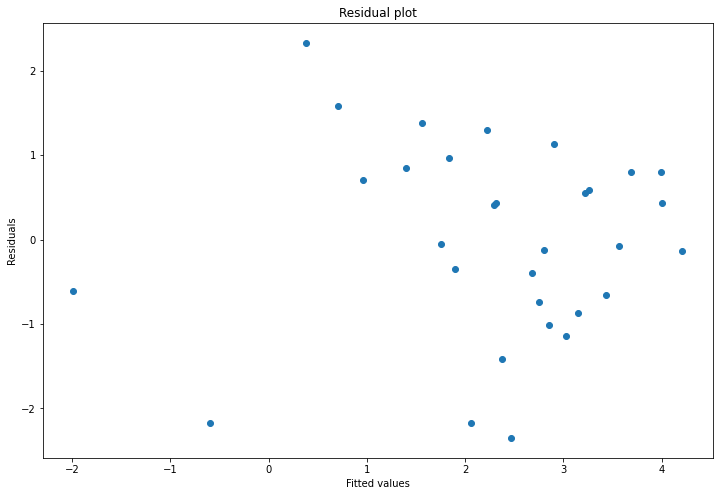

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

# fit OLS model
X = data[['interest', 'inflation', 'investment', 'exports', 'debt']]
X = sm.add_constant(X) # add constant term
y = data['gdp_growth']
model = sm.OLS(y, X).fit()

# make predictions and calculate residuals
y_pred = model.predict(X)
resid = y - y_pred

# plot residuals vs. fitted values
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_pred, resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()



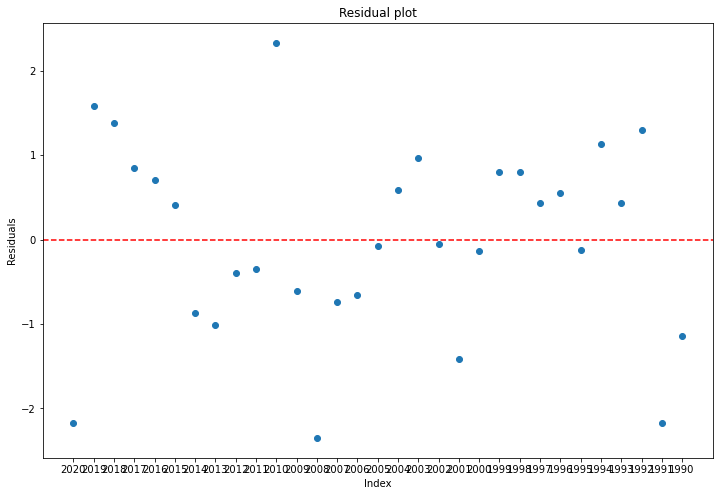

Residual summary statistics:
 count    31.000000
mean     -0.000211
std       1.142308
min      -2.349826
25%      -0.697336
50%      -0.054836
75%       0.795720
max       2.332103
dtype: float64

Residual skewness:  -0.33553476039284547
Residual kurtosis:  -0.22480252130816947

Jarque-Bera test p-value:  0.7010935340308977
Shapiro-Wilk test p-value:  0.6347225308418274


In [43]:

# plot residuals vs. index
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.index, resid)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Index')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

# statistical analysis of residuals
print("Residual summary statistics:\n", resid.describe())
print("\nResidual skewness: ", resid.skew())
print("Residual kurtosis: ", resid.kurtosis())
print("\nJarque-Bera test p-value: ", sm.stats.stattools.jarque_bera(resid)[1])

shapiro_stat, shapiro_pvalue = shapiro(resid)
print('Shapiro-Wilk test p-value: ', shapiro_pvalue)